In [56]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
import random
from cluster import (
        KMeans, 
        Silhouette, 
        make_clusters,
        plot_clusters,
        plot_multipanel)

In [8]:
# define vars
k=3
# mat=np.random.randint(100, size=(30,2))
mat, observed_labels=make_blobs(n_samples=100, centers=k)


<Axes: xlabel='x', ylabel='y'>

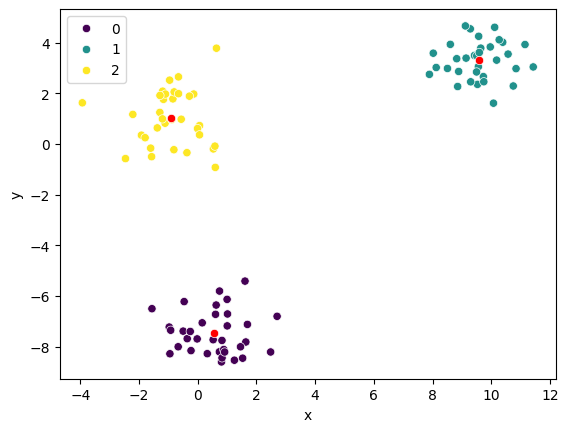

In [9]:
# visualize ground truth cluster labels
mat_df=pd.DataFrame(mat, columns=['x','y'])
mat_df['cluster']=observed_labels

# get true centroids
observed_centroids=[]
for c in set(observed_labels):
    mat_df_cluster=mat_df[mat_df['cluster']==c] # .drop(['cluster'], axis=1)
    observed_centroids.append(list(mat_df_cluster.mean()))
observed_centroids_df=pd.DataFrame(observed_centroids, columns=['x','y','cluster'])

# plot points with centroids
sns.scatterplot(data=mat_df, x='x', y='y', hue='cluster', palette='viridis')
sns.scatterplot(data=observed_centroids_df, x='x', y='y', color='red')


In [57]:
# initialize centroids
random.seed(76)
centroids=mat[np.random.choice(mat.shape[0], k, replace=False),:]

# get distances
cdist_mat=cdist(mat, centroids)
predicted_labels=np.argmin(cdist_mat, axis=1)


<Axes: xlabel='x', ylabel='y'>

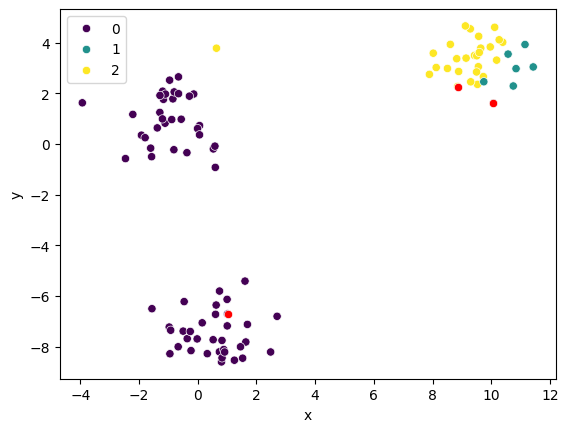

In [48]:
# visualize predicted cluster labels
mat_df=pd.DataFrame(mat, columns=['x','y'])
mat_df['cluster']=predicted_labels
predicted_centroids_df=pd.DataFrame(centroids, columns=['x','y'])

# plot points with centroids
sns.scatterplot(data=mat_df, x='x', y='y', hue='cluster', palette='viridis')
sns.scatterplot(data=predicted_centroids_df, x='x', y='y', color='red')

In [58]:
# fit centroids to data
itr=0
old_centroids=[]
max_iter=10

# fitting loop
while itr<max_iter:

    cdist_mat=cdist(mat, centroids)
    predicted_labels=np.argmin(cdist_mat, axis=1)
    old_centroids=centroids

    updated_centroids=[]
    for c in set(predicted_labels):
        mat_cluster=mat[np.where(predicted_labels==c)]
        updated_centroids.append(np.mean(mat_cluster, axis=0))
    centroids=updated_centroids
    
    itr+=1



<Axes: xlabel='x', ylabel='y'>

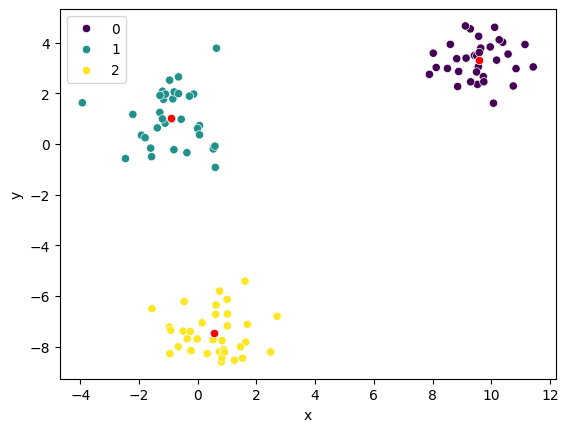

In [59]:
# visualize predicted cluster labels
mat_df=pd.DataFrame(mat, columns=['x','y'])
mat_df['cluster']=predicted_labels
predicted_centroids_df=pd.DataFrame(centroids, columns=['x','y'])

# plot points with centroids
sns.scatterplot(data=mat_df, x='x', y='y', hue='cluster', palette='viridis')
sns.scatterplot(data=predicted_centroids_df, x='x', y='y', color='red')

In [60]:
# fit via kmeans function
kmeans=KMeans(k=3, tol=1, max_iter=10)
kmeans.fit(mat)

<Axes: xlabel='x', ylabel='y'>

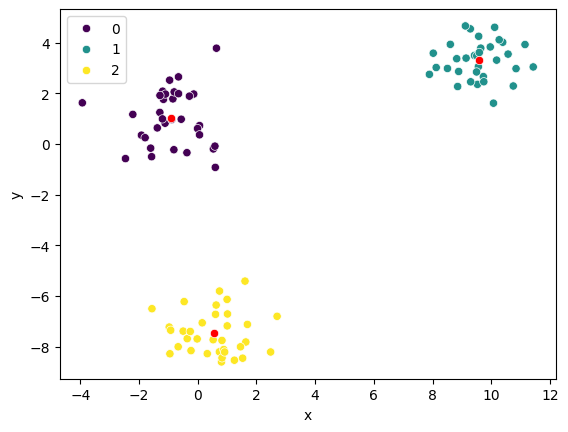

In [61]:
# visualize predicted cluster labels by kmeans function
mat_df=pd.DataFrame(kmeans.mat, columns=['x','y'])
mat_df['cluster']=kmeans.cluster_labels
predicted_centroids_df=pd.DataFrame(kmeans.centroids, columns=['x','y'])

# plot points with centroids
sns.scatterplot(data=mat_df, x='x', y='y', hue='cluster', palette='viridis')
sns.scatterplot(data=predicted_centroids_df, x='x', y='y', color='red')

In [23]:
for cent in centroids:
    print(old_centroids[cent])

TypeError: only integer scalar arrays can be converted to a scalar index

In [62]:
np.mean(np.subtract(centroids, old_centroids)/old_centroids*100)

0.0

In [63]:
centroids

[array([9.57726539, 3.30371382]),
 array([-0.89946402,  1.03041296]),
 array([ 0.5440963, -7.4617299])]

In [64]:
old_centroids

[array([9.57726539, 3.30371382]),
 array([-0.89946402,  1.03041296]),
 array([ 0.5440963, -7.4617299])]

In [27]:
centroids

[array([9.57726539, 3.30371382]),
 array([ 0.5440963, -7.4617299]),
 array([-0.89946402,  1.03041296])]